# Выбор локации для скважины

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.* Нужно решить, где бурить новую скважину.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# назовем таблицы для применения в функции
df_1.name = 'Region_1'
df_2.name = 'Region_2'
df_3.name = 'Region_3'

In [4]:
# передадим названия датафреймов для дальнейшего цикла
data=[df_1, df_2, df_3]

In [5]:
# функция для вывода общей информации
def begin(data):
    print('\033[1m' + '\n    Общая информация по' + '\033[0m', '\033[1m' + data.name+ '\033[0m', '\n')
    print(data.sample(5)) # вывод 5 строк
    print('\033[1m' + '\nОбщая информация\n' + '\033[0m')
    data.info() # общая информация
    print('\033[1m' + '\nОписательная статистика:'+ '\033[0m')
    print(data.describe()) # описат.статистика
    print('\033[1m' + '\nРаспределение признаков:'+ '\033[0m')
    data.hist(figsize=(10,7)); # гистограммы
    plt.show()
    print('\033[1m' + '\nКорреляция:'+ '\033[0m')
    print(data.corr()) # коэффициент корреляции между признаками
    print('\033[1m' + '\nКоличество пропущенных значений' + '\033[0m', data.isna().sum().sum())
    print('\033[1m' + 'Количество дубликатов:' + '\033[0m', data.duplicated().sum())
    print()
    print()


    Общая информация по Region_1 

          id        f0        f1        f2    product
77602  qO1AJ  1.386824 -0.514537 -1.919531  30.654925
89682  bSLGC  1.046562  0.266910  0.217766  55.681447
64846  pRnCj -0.639884  0.780145  2.759800  16.295060
87849  N7AeH  0.697312  0.793436 -0.891046  88.531940
25382  Q0IWO  1.856547 -0.222572  2.638101  78.787385

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Описательная статистика:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.

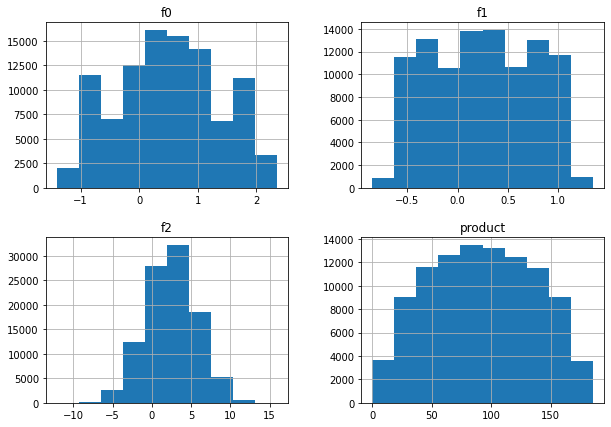


Корреляция:
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

Количество пропущенных значений 0
Количество дубликатов: 0



    Общая информация по Region_2 

          id         f0        f1        f2     product
95347  obA5S   8.909136  0.671548  0.997017   26.953261
29129  j4RcV  14.335810 -5.759188  5.003746  134.766305
43257  lrYui  -1.729035 -2.662447 -0.005004    3.179103
38998  qrBUp  12.236527 -3.846813  3.997633  107.813044
39776  1YFg8 -10.285997 -7.659120  1.995813   57.085625

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null

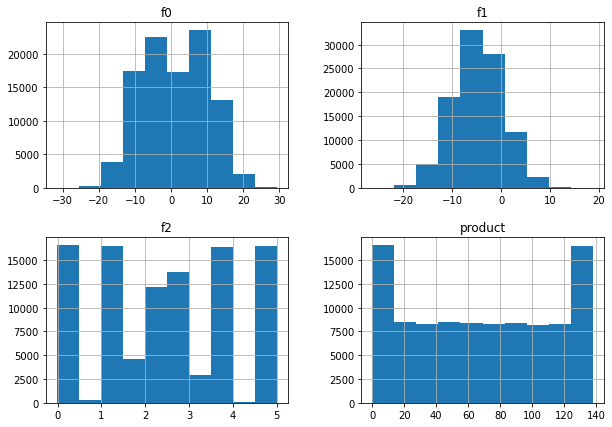


Корреляция:
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

Количество пропущенных значений 0
Количество дубликатов: 0



    Общая информация по Region_3 

          id        f0        f1        f2     product
87244  CPnA0  1.613252 -1.761422  5.306138   47.698404
38794  HfDMj  0.243811 -3.999154 -5.564770  118.695985
75160  PZnkP  1.666505  0.109507  7.100121   56.669398
43448  3S0Ie -1.324979 -0.781110  2.603628   75.262811
16776  vTDIW  1.692568  0.686276  4.311940  114.201388

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  floa

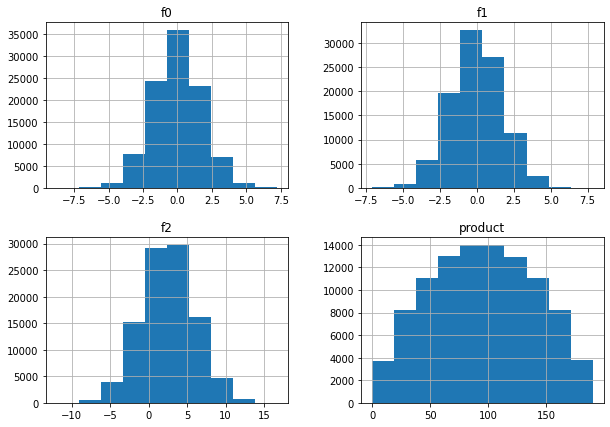


Корреляция:
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000

Количество пропущенных значений 0
Количество дубликатов: 0




In [6]:
for df in data:
    begin(df)

Нам предоставлены три исходных файла с данными геологоразведки по трем регионам. В каждом датафрейме 100 тыс. строк 4 столбца:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).
При анализе в датафреймах дубликатов и пропущенных значений не выявлено, типы столбцов корректны.

По гистограммам видно, что целевой признак - product в Регионе_1 и Регионе_3 распределены нормально, в данных регионах медиана и среднее значение отличается незначительно в сравлении с Регионом_2. При этом гистограмма в Регионе_2 не имеет нормального распределения, в гистограмме присутствует два пика. Также в Регионе_2 очень высокая корреляция между целевым признаком и f2, которая практически равна 1.


## Обучение и проверка модели

 С помощью функции: 
 - Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
 - Обучим модель и сделаем предсказания на валидационной выборке.
 - Сохраним предсказания и правильные ответы на валидационной выборке.



In [7]:
# функция предсказаний и правильных ответов валидационной выборки
def get_predict_model(data):
    target = data['product']
    features = data.drop(['product','id'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train,target_train)
    predict = model.predict(features_valid)
    return target_valid, pd.Series(predict)

In [8]:
# сохраним предсказания и правильные ответы для валидационной выборки
target_1, predict_1 = get_predict_model(df_1)
target_2, predict_2 = get_predict_model(df_2)
target_3, predict_3 = get_predict_model(df_3)

In [9]:
# функция для вычисления метрик (не смогла понять как не дублировать функцию выше, чтобы потом вывести циклом три региона, 
# поэтому оставила так)
def get_metrics(data):
    target = data['product']
    features = data.drop(['product','id'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train,target_train)
    predict = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predict)
    print('\033[1m' + data.name + '\033[0m')
    print('RMSE модели по ', data.name, '- ', round(mse**0.5, 4))
    print('Средний запас фактического сырья по ' + data.name, '- ', round(target_valid.mean(), 4)) 
    print('Средний запас предсказанного сырья по ' + data.name, '- ', round(predict.mean(), 4))

In [10]:
for pred in data:
    get_metrics(pred)
    print()

Region_1
RMSE модели по  Region_1 -  37.5794
Средний запас фактического сырья по Region_1 -  92.0786
Средний запас предсказанного сырья по Region_1 -  92.5926

Region_2
RMSE модели по  Region_2 -  0.8931
Средний запас фактического сырья по Region_2 -  68.7231
Средний запас предсказанного сырья по Region_2 -  68.7285

Region_3
RMSE модели по  Region_3 -  40.0297
Средний запас фактического сырья по Region_3 -  94.8842
Средний запас предсказанного сырья по Region_3 -  94.965



Модели обучены и проверены на качество предсказания метрикой RMSE, которая определяет величину среднеквадратичной ошибки в предсказании модели. Исходя из полученных данных, можно заметить, что величина RMSE во втором регионе сильно отличается от двух других и близка к 0, это могло быть связано с тем, что в этом регионе наблюдалась очень высокая корреляция f2 и product. Наибольшая среднеквадратичная ошибка наблюдается в Region_3.

## Подготовка к расчёту прибыли

Подготовьтесь к расчёту прибыли:
 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 4.1. Выберите скважины с максимальными значениями предсказаний. 
 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 4.3. Рассчитайте прибыль для полученного объёма сырья.

In [11]:
# При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
wells = 200

In [12]:
# Бюджет на разработку скважин в регионе — 10 млрд рублей.
investment = 10000000000

In [13]:
# При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
profit_per_barr = 450000

In [14]:
# Достаточный объем сырья для безубыточной разработки
oil_volume = investment/(profit_per_barr*wells)

In [15]:
print('Достаточный объем сырья для безубыточной разработки новой скважины составляет {:.2f} тыс. баррелей'.format(oil_volume))

Достаточный объем сырья для безубыточной разработки новой скважины составляет 111.11 тыс. баррелей


In [16]:
# Затраты на одну скважину
cost_per_well = investment/wells

In [17]:
print('Затраты на одну скважину составляют {} рублей'.format(cost_per_well))

Затраты на одну скважину составляют 50000000.0 рублей


Выберем 200 скважин с максимальным количеством сырья в каждом регионе с помощью функции:

In [18]:
def top_profit(predict, target):
    target = pd.Series(target).reset_index(drop=True) # приводим к типу Series и сбросим индексы
    predict = pd.Series(predict).reset_index(drop=True) # приводим к типу Series и сбросим индексы
    predict_sorted = predict.sort_values(ascending=False) # сортируем по убыванию предсказания
    top_target = target[predict_sorted.index][:200] # выбираем 200 скважин с наибольшими предсказанными объемами, но считаем по фактическим объемам
    profit = top_target.sum()
    return round((((profit*profit_per_barr)-investment)/1000000000),5)

In [19]:
print('Прибыль в Region_1 по скважинам с максимальным количеством сырья составляет {} млрд.руб. '.format(top_profit(predict_1, target_1)))
print('Прибыль в Region_2 по скважинам с максимальным количеством сырья составляет {} млрд.руб. '.format(top_profit(predict_2, target_2)))
print('Прибыль в Region_3 по скважинам с максимальным количеством сырья составляет {} млрд.руб. '.format(top_profit(predict_3, target_3)))

Прибыль в Region_1 по скважинам с максимальным количеством сырья составляет 3.32083 млрд.руб. 
Прибыль в Region_2 по скважинам с максимальным количеством сырья составляет 2.41509 млрд.руб. 
Прибыль в Region_3 по скважинам с максимальным количеством сырья составляет 2.71035 млрд.руб. 


Таким образом, достаточный объем сырья для безубыточной разработки составляет 111 тыс. барр. Ни в одном из регионов средние объемы не достигают этой отметки.
Далее были отобраны 200 скважин в каждом регионе с наибольшей мощностью, которые предсказала модель. По этим 200 скважинам просуммировали фактические данные и посчитали прибыль. По предварительным данным в каждой регионе прибыль от разработки составит от 2,4 до 3,32 миллиарда рублей. При этом максимальная прибыль в Region_1, а минимальная - в Region_2.

## Расчёт прибыли и рисков 

Посчитаем риски и прибыль для каждого региона:
- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [20]:
# функция для bootstrap и расчета метрик 
def bootstrap(target, pred):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000): # бутстрап с 1000 выборок
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        probs_subsample = pred[target_subsample.index]
        value = top_profit(probs_subsample, target_subsample)
        values.append(value)
        
    values = pd.Series(values)
    lower = values.quantile(q=0.025) # начало доверительного интервала
    upper = values.quantile(0.975) # конец доверительного интервала
    means = values.mean() # средняя выручка
    loss = values[values<0] # убытки
    max_values = values.max() # максимальная прибыль
    max_loss = values.min() # максимальный убыток
    print("Средняя выручка составляет {:.5f} млрд.руб.".format(means))
    print("2.5%-квантиль:", round(lower, 6))
    print("97.5%-квантиль:", round(upper, 6))
    print("Вероятность убытка составляет {:.2%}".format(len(loss)/len(values)))
    print("Максимальная выручка составляет {:.5f} млрд.руб.".format(max_values))
    print("Максимальный убыток составляет {:.5f} млрд.руб.".format(max_loss))

In [21]:
print('\033[1m' +'Region_1'+'\033[0m') 
bootstrap(target_1, predict_1)

Region_1
Средняя выручка составляет 0.39617 млрд.руб.
2.5%-квантиль: -0.111214
97.5%-квантиль: 0.909764
Вероятность убытка составляет 6.90%
Максимальная выручка составляет 1.34927 млрд.руб.
Максимальный убыток составляет -0.36957 млрд.руб.


In [22]:
print('\033[1m' +'Region_2'+'\033[0m')
bootstrap(target_2, predict_2)

Region_2
Средняя выручка составляет 0.45605 млрд.руб.
2.5%-квантиль: 0.03382
97.5%-квантиль: 0.852286
Вероятность убытка составляет 1.50%
Максимальная выручка составляет 1.15405 млрд.руб.
Максимальный убыток составляет -0.19227 млрд.руб.


In [23]:
print('\033[1m' +'Region_3'+'\033[0m')
bootstrap(target_3, predict_3)

Region_3
Средняя выручка составляет 0.40440 млрд.руб.
2.5%-квантиль: -0.163349
97.5%-квантиль: 0.950363
Вероятность убытка составляет 7.60%
Максимальная выручка составляет 1.33059 млрд.руб.
Максимальный убыток составляет -0.41786 млрд.руб.


По всем параметрам самым прибыльным оказался Регион_2 со средней выручкой 0.45 млрд.руб. и вероятностью убытка в 1.5%. В двух других регионах вероятность убытка начинается от 6.9%, что намного превышает допустимый порог 2.5%. И при доверительном интервале 95% уже в начале интервала Регион_2 уже показывает прибыль, что отличает его от двух других регионов.

Таким образом, при сравнительно меньшими запасами сырья в Регионе_2 средняя доходность выше, чем в двух других регионов.


## Общий вывод

В исходных данных были предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов для выбора перспективного региона для разработки скважин.
Был произведен анализ данных, в котором были проверены дубликаты, пропущенные значения, распределение данных по гистограмме и корреляция. По гистограммам по признаку product в Регионе_1 и Регионе_3 распределение близилось к нормальному, в свою очередь, в Регионе_2 распределение с двумя пиками и коэффициент корреляции между f3 и product равняется практически 1.

Далее данные были разбиты на обучающие и валидационные выборки. Модели обучены с помощью линейной регресси, сделан прогноз и рассчитано среднеквадратичное отклонение. Таким образом, наименьшее среднеквадратичное отклонение было в Регионе_2, при этом в этом регионе самый маленький средний запас сырья.

Перед расчетом прибыли и рисков был посчитан достаточный объем сырья для безубыточной разработки, который составляет 111 тыс. барр. Ни в одном из регионов средние объемы не достигают этой отметки. Следующим шагом были отобраны 200 скважин в каждом регионе с наибольшей мощностью, которые предсказала модель. По этим 200 скважинам просуммировали фактические данные и посчитали прибыль. По предварительным данным в каждой регионе прибыль от разработки составит от 2,4 до 3,32 миллиарда рублей. При этом максимальная прибыль в Region_1, а минимальная - в Region_2.

При расчете прибыли и рисков в каждом регионе была использована техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли, найдена средняя выручка, 95%-й доверительный интервал и  вероятность убытков.
По всем параметрам Регион_2 является регионом с наибольшим показателем выручки - 0.45 млрд.руб. и наименьшей вероятность убытков - 1.5%

Таким образом, не смотря на сравнительно меньшие предсказания запасов сырья по сравнению с другими регионами, в Регионе_2 вероятность возникновения убытка составляет 1,5% и средней выручкой 0.45 млрд., что по всем показателям является лучшим регионом для разработки. Поэтому предлагаю Регион_2 для разработки 200 скважин.

